<a href="https://colab.research.google.com/github/MuqadirHussain/project/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import tensorflow
import tensorflow as tf

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#Loading dataset
fashion_mnist=tf.keras.datasets.fashion_mnist


In [4]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

# Model design


In [16]:
index=7000
np.set_printoptions(linewidth=320)
print(f"Label: {train_labels[index] }")
print(f"\n\n Pixel array: \n\n{train_images[index]} \n\n")


Label: 9


 Pixel array: 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  50 193 184 147 114  92  52  31   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   3   0  38 255 236 228 255 255 255 255 255 225 239 122   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  12   0 105 242 216 222 222 222 225 235 235 236 249 212   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0

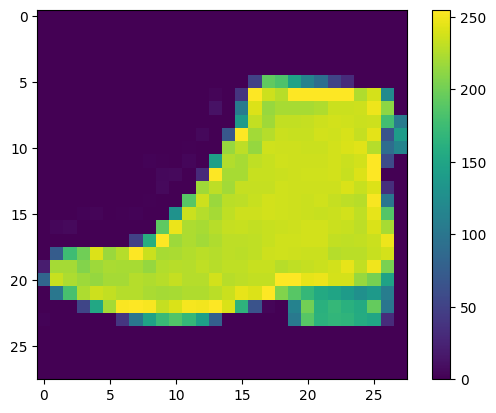

In [17]:
plt.imshow(train_images[index])
plt.colorbar()
plt.show()

In [18]:
train_images=train_images / 255.0
test_images= test_images / 255.0

In [19]:
model=tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [33]:
#call back  class
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs=None):
    if logs["loss"]<0.2:
      print("\nLoss is lower than 0.2 so cancelling training!")
      self.model.stop_training = True

In [32]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)
model.fit(train_images,train_labels,epochs=20,callbacks=[myCallback()])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9142 - loss: 0.2324
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9184 - loss: 0.2189
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9209 - loss: 0.2121
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9234 - loss: 0.2050
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9255 - loss: 0.2014
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9276 - loss: 0.1911
Loss is lower than 0.4 so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9276 - loss: 0.1911


In [22]:
#evaluate model
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8742 - loss: 0.3622


[0.3680148422718048, 0.870199978351593]

In [24]:
#predict model
classification = model.predict(test_images)
print(classification[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[6.2013372e-05 5.2567380e-08 9.1583024e-06 4.0246098e-07 2.1760779e-06 1.1958117e-03 1.6314518e-05 5.3361282e-02 1.1205492e-03 9.4423217e-01]


In [25]:
print(test_labels[0])

9


In [27]:
predicted_class = tf.argmax(classification[100]).numpy()  # .numpy() converts to a Python integer

# Print the predicted class
print("Predicted class:", predicted_class)

Predicted class: 3


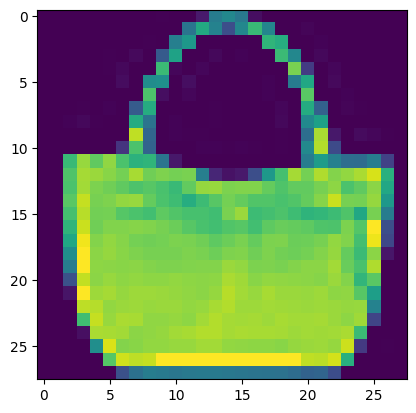

In [28]:
plt.imshow(train_images[100])
plt.show()

In [1]:
5*5*64


1600